In [191]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.tseries.offsets import Nano

In [192]:
experiment = 'experiment6'

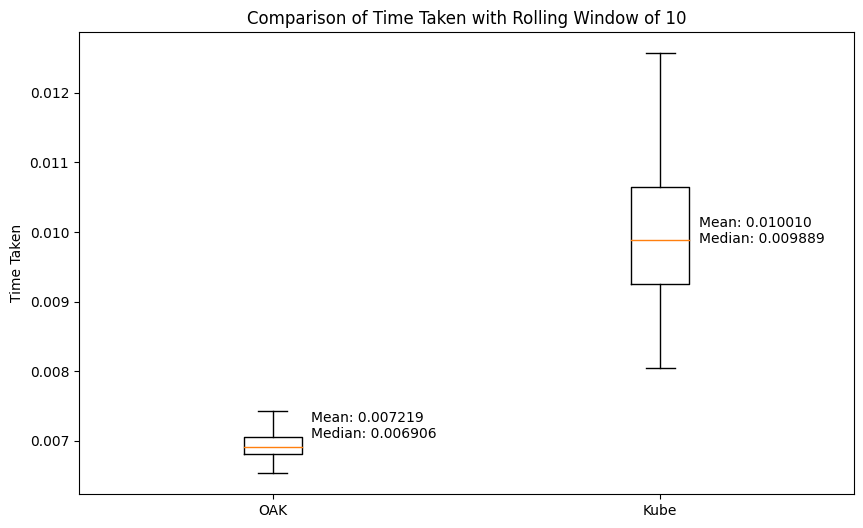

In [193]:
df1 = pd.read_csv(f"results/{experiment}/resources_0.csv")
df2 = pd.read_csv(f"results/{experiment}/resources_1.csv")

df1['File'] = 'OAK custom resources'
df2['File'] = 'Kube custom resources'

df1['rolling_time_taken'] = df1['time_taken'].rolling(window=10).mean()
df2['rolling_time_taken'] = df2['time_taken'].rolling(window=10).mean()

# Drop NaN values that result from the rolling window
df1 = df1.dropna(subset=['rolling_time_taken'])
df2 = df2.dropna(subset=['rolling_time_taken'])

# Calculate mean and median
mean1 = df1['rolling_time_taken'].mean()
median1 = df1['rolling_time_taken'].median()
mean2 = df2['rolling_time_taken'].mean()
median2 = df2['rolling_time_taken'].median()

# Create boxplots
plt.figure(figsize=(10, 6))
box = plt.boxplot([df1['rolling_time_taken'], df2['rolling_time_taken']], labels=['OAK', 'Kube'], showfliers=False)

# Annotate mean and median
plt.text(1.1, mean1, f'Mean: {mean1:.6f}\nMedian: {median1:.6f}', verticalalignment='center')
plt.text(2.1, mean2, f'Mean: {mean2:.6f}\nMedian: {median2:.6f}', verticalalignment='center')

plt.title('Comparison of Time Taken with Rolling Window of 10')
plt.ylabel('Time Taken')
plt.show()

In [194]:
# df1 = pd.read_csv(f"results/{experiment}/entries_0.csv")
# df2 = pd.read_csv(f"results/{experiment}/entries_1.csv")

# df1['File'] = 'OAK custom resources objects'
# df2['File'] = 'Kube custom resources objects'

# concat_df = pd.concat([df1, df2])

# # Boxplot for creation_time
# box_plot_creation = sns.boxplot(data=concat_df, x='File', y='creation_time', showfliers=False)

# means_creation = concat_df.groupby('File')['creation_time'].mean()
# medians_creation = concat_df.groupby('File')['creation_time'].median()

# xlabels = box_plot_creation.get_xticklabels()

# for i, xlabel in enumerate(xlabels):
#     mean = means_creation[xlabel.get_text()]
#     median = medians_creation[xlabel.get_text()]
#     box_plot_creation.text(i, mean, f'Mean: {mean:.6f}', horizontalalignment='center', color='black', weight='semibold')
#     box_plot_creation.text(i, median, f'Median: {median:.6f}', horizontalalignment='center', color='blue', weight='semibold')

# plt.tight_layout()
# plt.show()

# print(means_creation)
# print(medians_creation)